In [1]:
from IPython.display import Image

----------------
## PANDAS - Statistics
------------


In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/data/AI-DATASETS/01-MISC/FertilizersProduct.csv", encoding = "ISO-8859-1")
  

In [6]:
df.shape

(164468, 11)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164468 entries, 0 to 164467
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     164468 non-null  int64  
 1   Area          164468 non-null  object 
 2   Item Code     164468 non-null  int64  
 3   Item          164468 non-null  object 
 4   Element Code  164468 non-null  int64  
 5   Element       164468 non-null  object 
 6   Year Code     164468 non-null  int64  
 7   Year          164468 non-null  int64  
 8   Unit          164468 non-null  object 
 9   Value         164468 non-null  float64
 10  Flag          164468 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ MB
None


We see that the data contains 11 columns with integer, float and categorical types. Now, let’s print the first five rows of data:

We see the first row of data corresponds to 4.49 tonnes of anhydrous Ammonia being imported to Afghanistan in 2011. Let’s proceed by considering all of the data for Afghanistan:

In [8]:
df_afghanistan = df[df['Area'] == 'Afghanistan'].copy()

In [9]:
df_afghanistan.sample(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
317,2,Afghanistan,4001,Urea,5157,Agricultural Use,2011,2011,tonnes,107228.00,Fb
198,2,Afghanistan,4011,Phosphate rock,5610,Import Quantity,2007,2007,tonnes,70.00,R
282,2,Afghanistan,4001,Urea,5610,Import Quantity,2011,2011,tonnes,3054.55,R
189,2,Afghanistan,4014,"Other phosphatic fertilizers, n.e.c.",5622,Import Value,2014,2014,1000 US$,280.69,R
304,2,Afghanistan,4001,Urea,5910,Export Quantity,2016,2016,tonnes,49.02,R


In [10]:
df_afghanistan['Value'].describe()

count       322.000000
mean       7310.726708
std       22577.867034
min           0.000000
25%          10.172500
50%         121.835000
75%        3041.512500
max      253523.030000
Name: Value, dtype: float64

Next, we can look at the distribution in quantity values with the ‘.hist()’ method:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

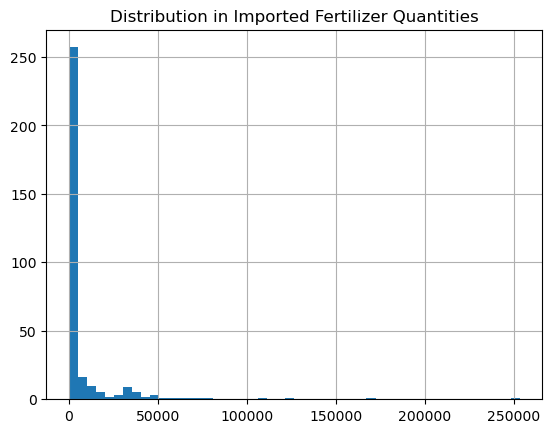

In [12]:
plt.title("Distribution in Imported Fertilizer Quantities")
df_afghanistan['Value'].hist(bins=50);

Further, look at the average quantity imported in tonnes using the ‘.mean()’ method:

In [13]:
print("Average Quantity: ", df_afghanistan['Value'].mean())

Average Quantity:  7310.726708074534


In [14]:
print("Standard Deviation in Quantity: ", df_afghanistan['Value'].std())

Standard Deviation in Quantity:  22577.867033595037


In [17]:
print("Correlation between Year and Quantity: ", df_afghanistan['Value'].corr(df_afghanistan['Year']))

Correlation between Year and Quantity:  0.04901704181393123


In [18]:
print("Minimum Quantity: ", df_afghanistan['Value'].min())
print("Maximum Quantity: ", df_afghanistan['Value'].max())

Minimum Quantity:  0.0
Maximum Quantity:  253523.03


Next, we can look at the `most frequently` occurring values, or the mode, in `categorical` columns. Let’s calculate the mode for the `Area` column in the original data:

In [26]:
print("Mode in Area: ", df['Area'].mode()[0])

Mode in Area:  Brazil


We can also use the ‘Counter()’ method to visualize how frequently categorical values appear. Let’s apply the ‘Counter()’ method to the ‘Item’ column in the original data:

In [19]:
from collections import Counter
Counter(df['Item'])

Counter({'Ammonia, anhydrous': 7512,
         'Ammonium nitrate (AN)': 8738,
         'Ammonium sulphate': 9054,
         'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate': 6132,
         'Diammonium phosphate (DAP)': 7807,
         'Fertilizers n.e.c.': 8786,
         'Monoammonium phosphate (MAP)': 7299,
         'NPK fertilizers': 10145,
         'Other nitrogenous fertilizers, n.e.c.': 8950,
         'Other NP compounds': 8500,
         'Other phosphatic fertilizers, n.e.c.': 6625,
         'Other potassic fertilizers, n.e.c.': 7115,
         'Phosphate rock': 6826,
         'PK compounds': 7160,
         'Potassium chloride (muriate of potash) (MOP)': 8851,
         'Potassium nitrate': 7588,
         'Potassium sulphate (sulphate of potash) (SOP)': 7738,
         'Sodium nitrate': 5976,
         'Superphosphates above 35%': 7169,
         'Urea': 10491,
         'Urea and ammonium nitrate solutions (UAN)': 4714,
         'Other NK compounds': 171,
       

In [20]:
df['Item'].value_counts()

Urea                                                                        10491
NPK fertilizers                                                             10145
Ammonium sulphate                                                            9054
Other nitrogenous fertilizers, n.e.c.                                        8950
Potassium chloride (muriate of potash) (MOP)                                 8851
Fertilizers n.e.c.                                                           8786
Ammonium nitrate (AN)                                                        8738
Other NP compounds                                                           8500
Diammonium phosphate (DAP)                                                   7807
Potassium sulphate (sulphate of potash) (SOP)                                7738
Potassium nitrate                                                            7588
Ammonia, anhydrous                                                           7512
Monoammonium pho

Now, let’s generate a bar plot to visualize this:

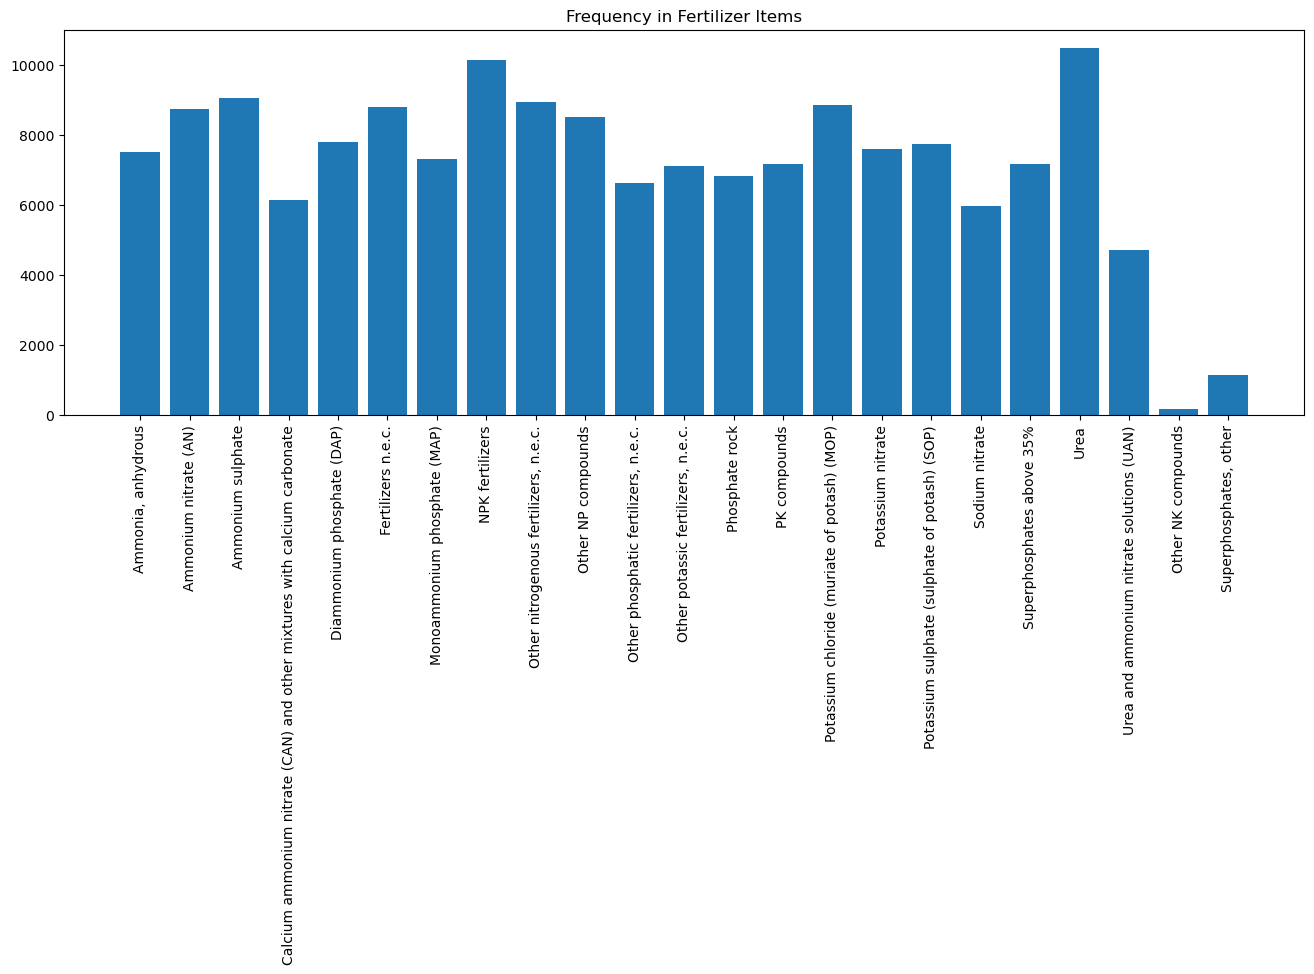

In [21]:
plt.figure(figsize=(16, 5))
plt.title("Frequency in Fertilizer Items")
plt.bar(dict(Counter(df['Item'])).keys(), dict(Counter(df['Item'])).values())

plt.xticks(rotation=90);